# Correlation in Python

When presented with a new collection of data, one of the first questions you may ask is how they are related to each other. This can involve deep study of how one parameter is likely to vary as you change another but the simplest start is to look a the linear correlation between them.

Given two lists of data points, let's see how we can calculate the linear correlation between them.

In [1]:
from pandas import DataFrame
import numpy as np

We'll start by creating a simple pandas DataFrame which contains two columns, each with a simple range of numbers. The first column will be `[0, 1, ..., 98, 99]` and the second will be `[0, 2, ..., 196, 198]`.

In [2]:
a = np.arange(100)
b = np.arange(100) * 2
df = DataFrame({"a": a, "b": b})
df.head()

a  b
0  0  0
1  1  2
2  2  4
3  3  6
4  4  8

To get an initial sense of the data, we can use the `DataFrame`'s `describe()` method which provides some simple summary statistics:

In [3]:
df.describe()

a           b
count  100.000000  100.000000
mean    49.500000   99.000000
std     29.011492   58.022984
min      0.000000    0.000000
25%     24.750000   49.500000
50%     49.500000   99.000000
75%     74.250000  148.500000
max     99.000000  198.000000

To then get access to the correlation between the `a` and `b` columns, it is a case of calling the `corr()` method:

In [4]:
df.corr()

a    b
a  1.0  1.0
b  1.0  1.0

What is printed is a matrix of correlation coefficients where each cell shows the correlation between the corresponding row and column label. The diagonals of a correlation matrix like this should always be 1 since and data set is 100% correlated with itself.

It is the off-diagonal terms therefore which contain the information we want. The bottom-left contains the correlation between `b` and `a` and the top-right contains the correlation between `a` and `b`. It's no surprise then that we'll find that the matrix is always symmetric.

Of course, this is a pretty boring result. The two sets of data are completely correlated with each other so we get a correlation of 1.

### Exercise

- Tweak the code used to generate the data sets and dataframe to make a pair of data sets which are 100% *inversely* correlated with each other. You should end up with a correlation of 1.0 on the diagonal and -1.0 on the off-diagonal. [<small>answer</small>](answer_negative_correlation.ipynb)

## Multiple cross-correlation

It's very common when working on real data that you have more than two figures of interest.

Later on in this course we will be uing a package called scikit-learn to discover information about data but for now we ware just going to use to to obtain one of the built-in data sets it provides, the [California housing dataset](https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset).

In [5]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

In [6]:
housing = DataFrame(housing_data.data, columns=housing_data.feature_names)

housing.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [7]:
housing.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.924664   1.000000

Here we see that it is just as easy to get the correlation between a large set of data as it is for a `DataFrame` with only two columns.

Again we see the the 1.0 occuring on the diagonal and a whole range of values between -1.0 and 1.0 off-diagonal.

If we want the correlation between two specific columns then we can request it from this object:

In [8]:
corr = housing.corr()
corr["MedInc"]["AveRooms"]

0.32689543164129486

### Exercise

- Look through the table manually and see if you can find the most negative and most positive correlations.
- Try to automate that search using Python code. [<small>answer</small>](answer_find_largest_correlations.ipynb)
  - Hint: To find the minimum, use the `min()` and `idxmin()` methods. To find the maximum, hide the diagonals first using `corr.replace(1.0, np.nan)`

## Plotting the correlation

Viewing the correlation coefficients as a table is useful if you want the precise value of the correlation but often you want a visual overview which can give you the information you want at a glance.

The easiest way to view it is as a heat map where each cell has a colour showing the value of the correlation.

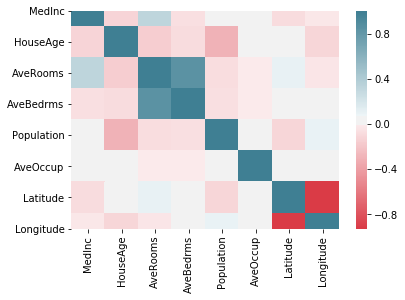

In [9]:
%matplotlib inline

import seaborn as sns

# We define a diverging colourmap so that 0.0 is white
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, cmap=cmap)

This gives us a sense of which parameters are strongly correlated with each other.

Pandas also provides a quick method of looking at a large number of data parameters at once and looking visually at which might be worth investigating. If you give the `scatter_matrix()` function any pandas `DataFrame` then it will plot all the pairs of parameters in the data.

The produced graph has a lot of information in it so it's worth taking some time to make sure you understand these plots. The plot is arranged with all the variables of interest from top to bottom and then repeated from left to right so that any one square in the grid is defined by the intersection of two variables.

Each box that is an intersection of a variable with another (e.g. row three, column one is the intersection between "AveRooms" and "MedInc") shows the scatter plot of how the values of those variables relate to each other. If you see a strong diagonal line it means that those variables are correlated in this data set. It it's more of a blob or a flat horizontal or vertical line then that suggests a low correlation.

The top-right triangle of the plot is a repeat of the bottom-left triangle, just with the items in the pair reversed (i.e. row one, column three is the intersection between "MedInc" and "AveRooms").

The square boxes along the diagonal from the top-left to the bottom-right are those intersections of a variable with itself and so are used, not to show correlation, but to show the distribution of values of the variable as a histogram.

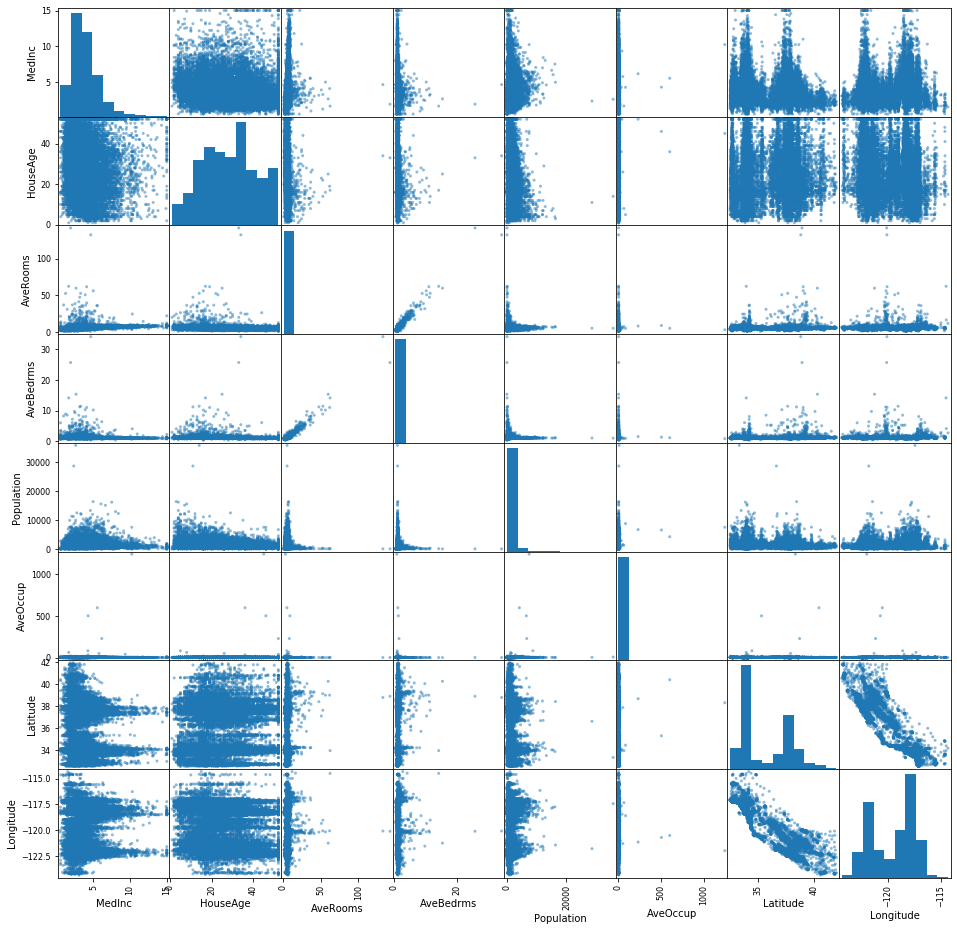

In [10]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(housing, figsize=(16, 16))

In general, when analysing data with some automated method, you want your data to be as uncorrelated as possible. This is because if two variables, _a_ and _b_ are strongly correlated with each other then it's possible to predict the value of _b_ from the value of _a_ with high confidence. This means that _b_ is not providing any additional predictive power.

In some cases this is not a problem as adding one extra variable does not slow down the algorithm used but some methods benefit from choosing carefully the parameters which are being fitted over.

It's also possible in some cases to transform the data in some way to reduce the correlation between variables. One example of a method which does this is principle component analysis (PCA).

### Exercise

- Try running through the above step using a different dataset from scikit-learn. You can find them listed at https://scikit-learn.org/stable/datasets/index.html#toy-datasets. _Iris_ is a classic dataset used in machine learning which it is worth being aware of. [<small>answer</small>](answer_iris_correlation.ipynb)

We will now take a brief aside on how you can draw geographical data onto a map.